## Finite Difference Method Workflow

### Let's set up a problem first. 
- Let's assume in a box (cartesian coordinates) there is a first order reaction for species C. On the left hand side (x=-L/2) species C is dissolving at a concentration of Cs.
- On the right hand side (x=L/2) there is no flux (ie. C is not leaving the system). 
- At the top and bottom of the box there is convective diffusion to let's say a infinite concentration so small is can be considered zero. 
- Additionally, let's say this is not at steady-state so at C(t=0)=0 in the box

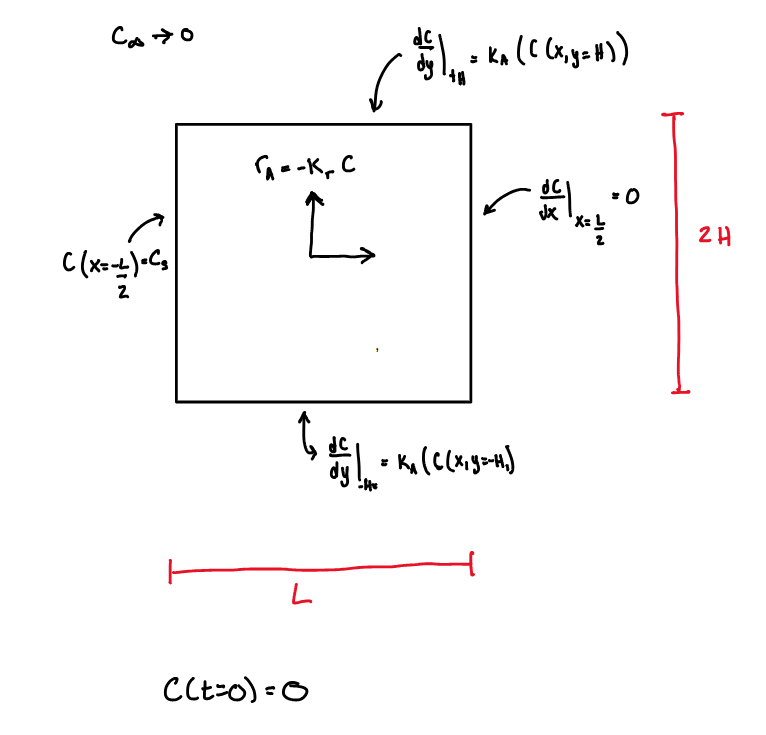

### 1) Setting up Mass Balance and Boundary Conditions
        Do some mass transport analysis magic to get these equations

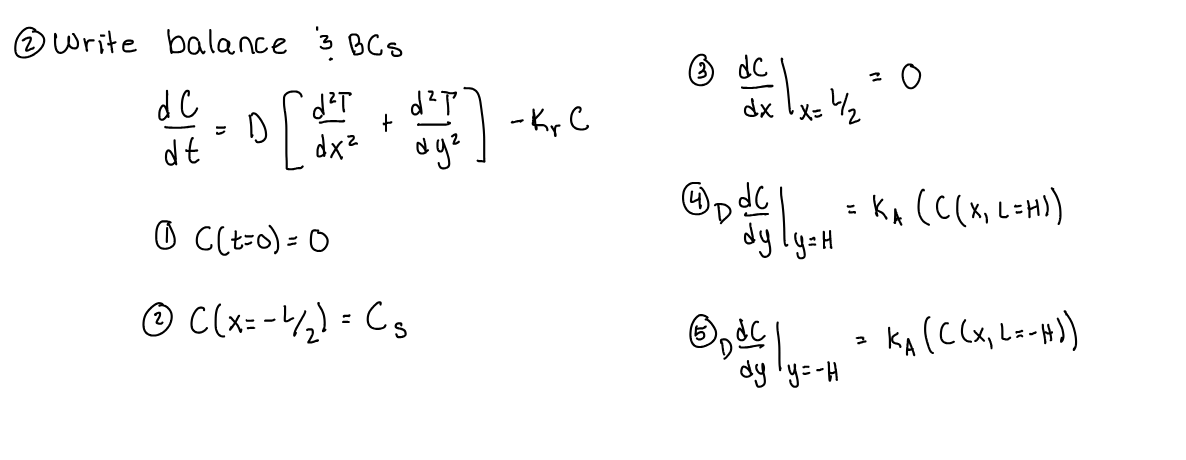

## 2) Apply FDM equations to the balance and boundary conditions

### Important tips to understand the notation: 
- You are gridding your system which means for each cell in your grid you are referencing how the concentration changes to the left, right, above, and below that cell to determine it's value. Using a matrix notation (i,j) indicates what cell I am analyzing at a specific time step. A visual is added below to explain this gridding. 

- Initial conditions will be considered when you initialize your grid.

Gridding the system: 

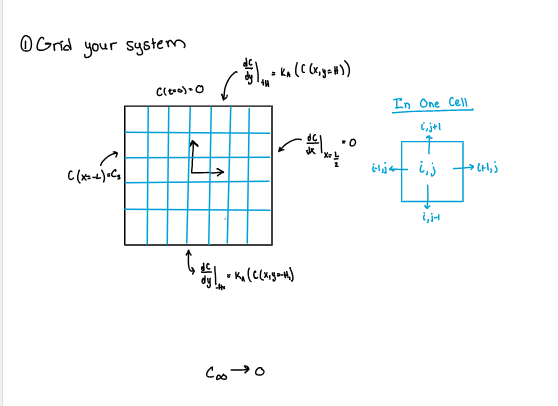


Apply FDM equations

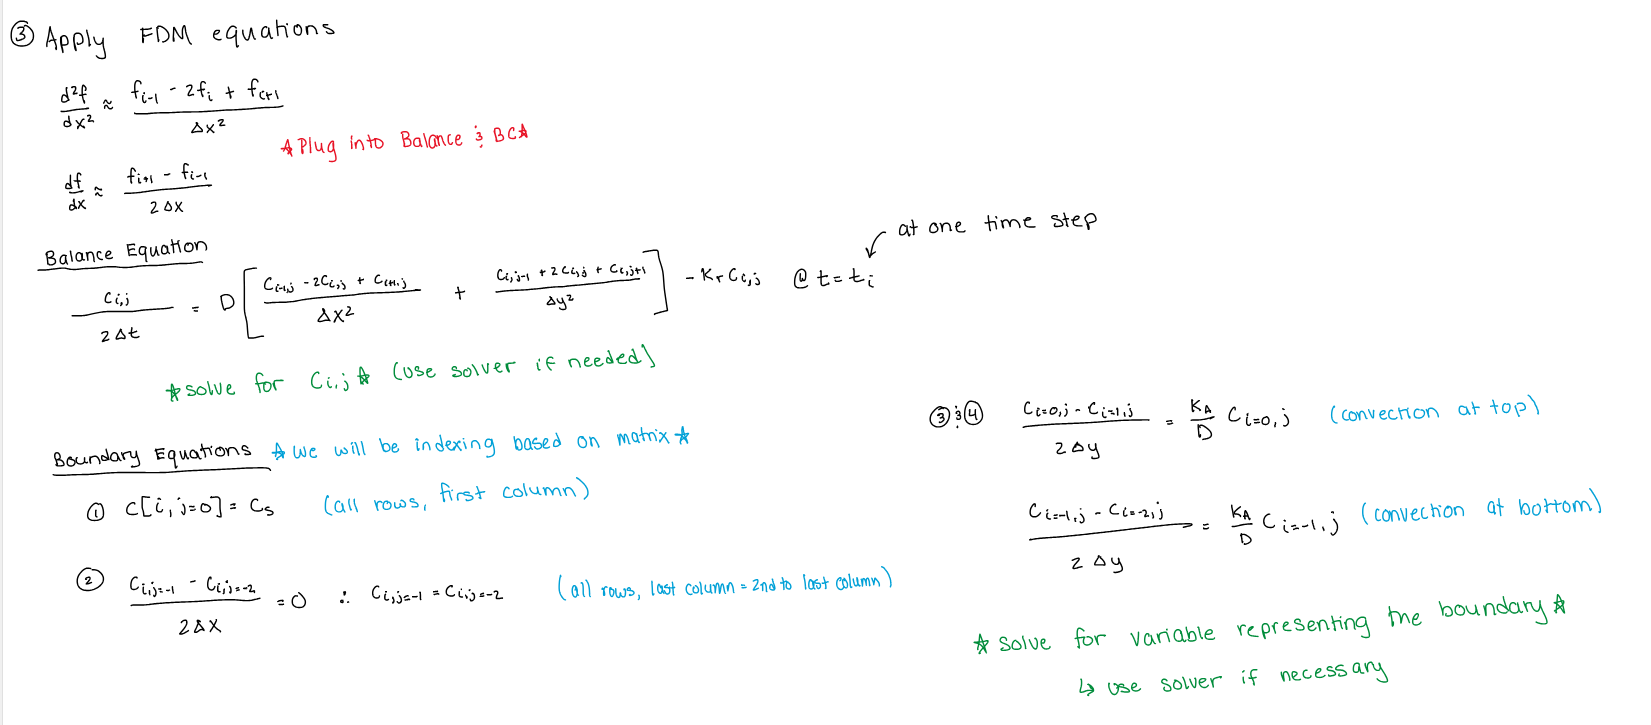

### 3) Code
#### Load Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt

#### Define Physical System

In [ ]:
## Define the parameters of your system ##
# Parameters
Lx = 1.0  # Length of the domain in x-direction
Ly = 2*0.5  # Length of the domain in y-direction (H=0.5 let's say)
D = 1   # Diffusion coefficient (m2/s)
T = 1   # Total time (s)
kc= 1.0 # mass transport coefficient (s/M)
kr= 1.0 # reaction rate (1/s)


#### Grid your system with cartesian coordinates and time steps

In [ ]:
## Discretization of the domain ##
Nx = 50   # Number of grid points in x-direction
Ny = 50   # Number of grid points in y-direction
Nt= 10000    # Number of grid points in time
dx = Lx / (Nx - 1) # Grid spacing in x-direction
dy = Ly / (Ny - 1) # Grid spacing in y-direction
dt= T / (Nt - 1) # Time step size

#### Initialize your system:
- Create your grid. In this system the initial concentration is just zero, so we will make a matrix of zeros to start. If instead we had an initial condition of 1, then we would make a matrix of ones. 

- Define boundary conditions

In [ ]:
# Initialize concentration field
C = np.zeros((Nx, Ny))

## Boundary conditions
## BC1: C = 1.0 at x = -Lx/2
C[:, 0] = 1.0  # Set concentration on the left side
## BC2: dC/dx = 0 at x = Lx/2
C[:, -1] = C[:, -2]  # No flux on the right side
## BC3: dC/dy = -kc/D*(C(y=-H))
C[0, :] = C[1, :] - kc* dy / D * (C[1, :] - C[0, :])  # Convection at the bottom
## BC4: dC/dy = kc/D*(C(y=H))
C[-1, :] = C[-2, :] + kc * dy / D * (C[-1, :] - C[-2, :])  # Convection at the top


#### Write out mass balance equation:
- For each time step:
    - Calculate the concentration at each cell
    - Update what the new concentration will be at the boundary conditions
    - Copy concentration values to repeat through the process until all steps are completed. 

This examples plots on a 2D grid

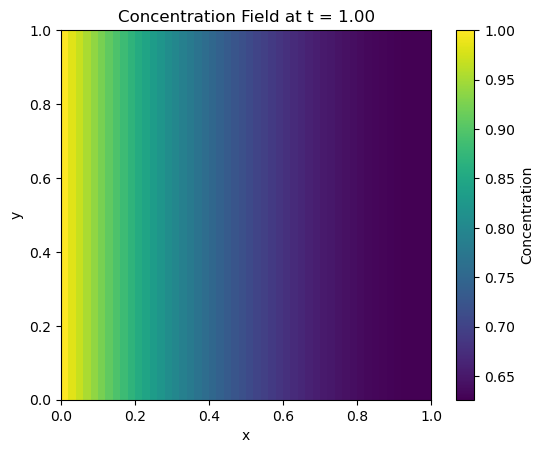

In [ ]:

# Finite difference method
for n in range(Nt):
    C_new = C.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            C_new[i, j] = C[i, j] + dt * (
                D * (C[i+1, j] - 2*C[i, j] + C[i-1, j]) / dx**2 +
                D * (C[i, j+1] - 2*C[i, j] + C[i, j-1]) / dy**2
            - kr * C[i, j]
            )
    # Update boundary conditions
    C_new[:, 0] = 1.0  # Set concentration on the left side
    C_new[:, -1] = C_new[:, -2]  # No flux on the right side
    C_new[0, :] = C_new[1, :] - kc * dy / D * (C_new[1, :] - C_new[0, :])  # Convection at the bottom
    C_new[-1, :] = C_new[-2, :] + kc * dy / D * (C_new[-1, :] - C_new[-2, :])  # Convection at the top
    C = C_new.copy()

# Plot the final concentration field
plt.imshow(C, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis')
plt.colorbar(label='Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Concentration Field at t = {:.2f}'.format(T))
plt.show()

#### If you would like to see how the concentration changes with time (or on a 3D plot) you can do something like this below. 
- We basicailly store the concentration at every other time step and plot that with time and position. You can do different combinations of this if you would like. 
    - Main tip is to make sure the dimensions are equal across variables  (ie. you have 10 values for X, 10 values for t, and 10 values for concentration). 

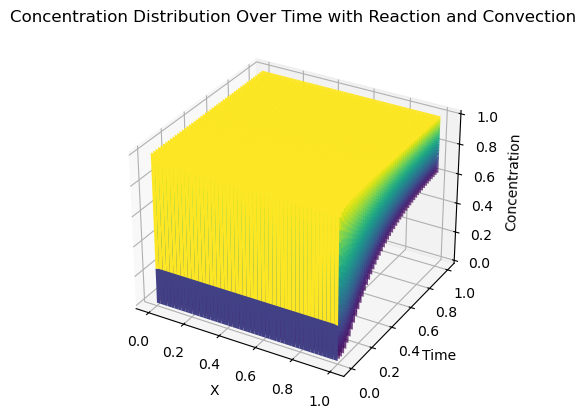

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create the grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initial concentration
C = np.zeros((Ny, Nx))

# Store concentration at different time steps for plotting
concentration_over_time = []

## Boundary conditions
## BC1: C = 1.0 at x = 0
C[:, 0] = 1.0  # Set concentration on the left side
## BC2: dC/dx = 0 at x = Lx
C[:, -1] = C[:, -2]  # No flux on the right side
## BC3: dC/dy = -kc/D*(C(y=-H))
C[0, :] = C[1, :] - kc* dy / D * (C[1, :] - C[0, :])  # Convection at the bottom
## BC4: dC/dy = kc/D*(C(y=H))
C[-1, :] = C[-2, :] + kc * dy / D * (C[-1, :] - C[-2, :])  # Convection at the top

# Finite difference method
for n in range(Nt):
    C_new = C.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            C_new[i, j] = C[i, j] + dt * (
                D * (C[i+1, j] - 2*C[i, j] + C[i-1, j]) / dx**2 +
                D * (C[i, j+1] - 2*C[i, j] + C[i, j-1]) / dy**2
            - kr * C[i, j]
            )
    # Update boundary conditions
    C_new[:, 0] = 1.0  # Set concentration on the left side
    C_new[:, -1] = C_new[:, -2]  # No flux on the right side
    C_new[0, :] = C_new[1, :] - kc * dy / D * (C_new[1, :] - C_new[0, :])  # Convection at the bottom
    C_new[-1, :] = C_new[-2, :] + kc * dy / D * (C_new[-1, :] - C_new[-2, :])  # Convection at the top
    C = C_new.copy()

    # Store the concentration for plotting
    if n % 200 == 0:
        concentration_over_time.append(C.copy())
# Convert the list to a 3D numpy array for plotting
concentration_over_time = np.array(concentration_over_time)

# Create a meshgrid for the time axis
time_steps = np.linspace(0, Nt * dt, len(concentration_over_time))
T, X = np.meshgrid(time_steps, x)

# Plot the concentration over time as a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each time step as a surface
for i in range(concentration_over_time.shape[0]):
    Y = np.ones_like(X) * time_steps[i]
    Z = concentration_over_time[i]
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Concentration')
ax.set_title('Concentration Distribution Over Time with Reaction and Convection')
plt.show()